# 0. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import requests as req
import time
import re

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV # 데이터 나누기, 점검 및 훈련

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, make_moons, load_digits, load_diabetes, load_wine # 데이터
import mglearn # 그래프

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

#### DecisionTree 관련
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # decisiontree에서 파생된 분류 알고리즘들
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_graphviz # 파이썬과 graphviz를 연동해준다

# conda install -c conda -py
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
# conda install -c conda-forge lightgbm
# plot_importance, plot_tree 객체명 같아
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric


import graphviz

import statsmodels.api as sm


# 1. DecisionTree & graphviz

- graphviz는 의사결정나무, 인공지능망 그래프 그리는데 필요한 프로그램
- https://graphviz.org/
- graphviz는 파이썬과 관계없이 독립적으로 사용 가능.
- 이걸 파이썬으로! 터미널에서 pip install graphviz
- graphviz path 이어주고 (제어판 )
- import os
- os.environ["PATH] += os.pathsep + "C:\Program Files\Graphviz\bin"


+ 설명하기 좋은 알고리즘
+ 직관적
+ 데이터의 스케일, 정규화, 표준화 관계없음. 거의 유일하게 영향을 받지 않음
+ 훈련 데이터에 집착하는 경향이 보임 -> 과대적합 가능성이 높다.
+ 다른 알고리즘보다 과대적합이 발생할 가능성이 몇배 높음
+ 그래서 과대적합 해결이 가장 큰 고민거리이자 관건

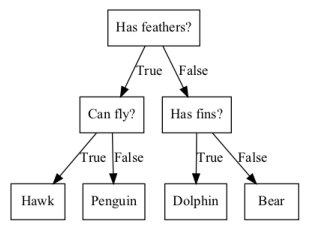

In [6]:
mglearn.plots.plot_animal_tree()

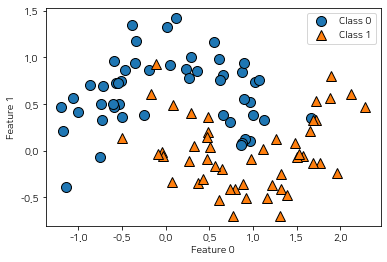

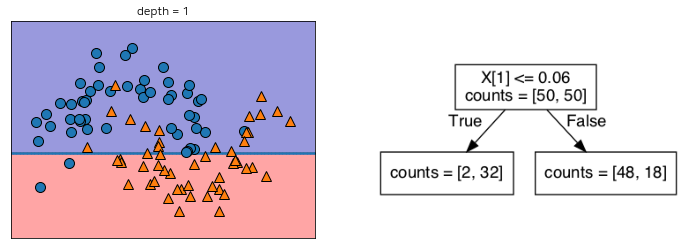

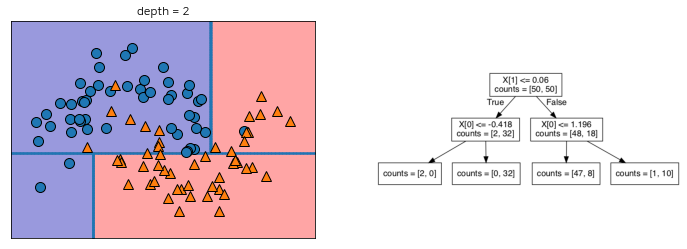

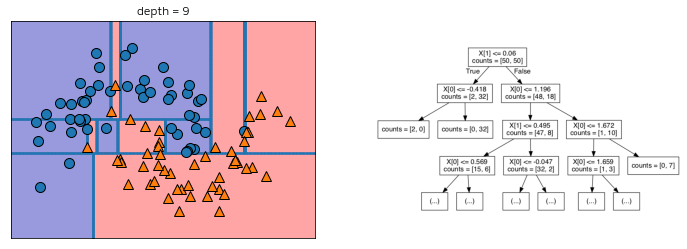

In [7]:
mglearn.plots.plot_tree_progressive()

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [10]:
dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)
# random_state와 함께 max_depth를 지정해주면 분류 단계 조정 가능

In [13]:
from sklearn.tree import export_graphviz

export_graphviz(
        dt_clf,
        out_file="data/iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
# 1. out_file에서 확장자는 dot이어야한다.
# 2. rounded는 그래프 내 박스 라운드 처리 여부 의미

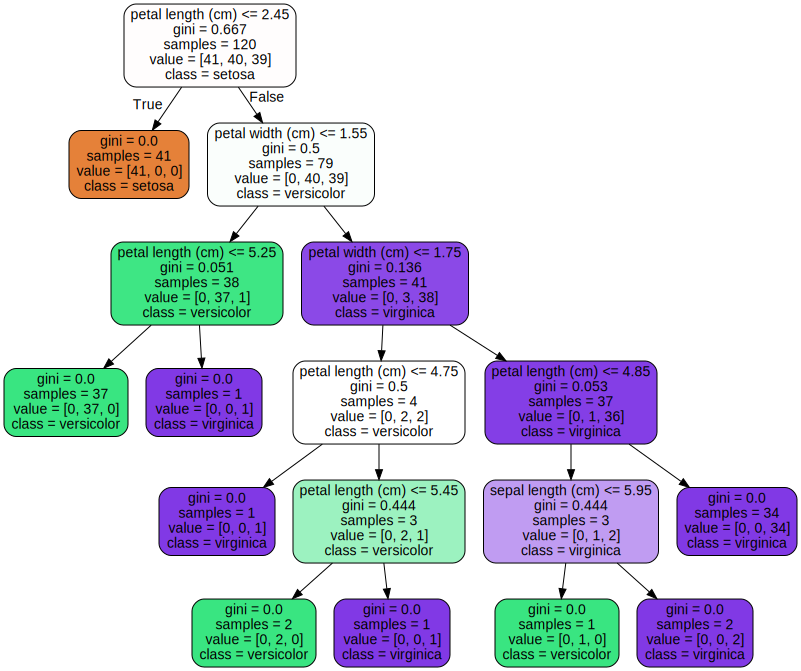

In [14]:
import graphviz
with open("data/iris_tree.dot") as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', cleanup=True)
dot

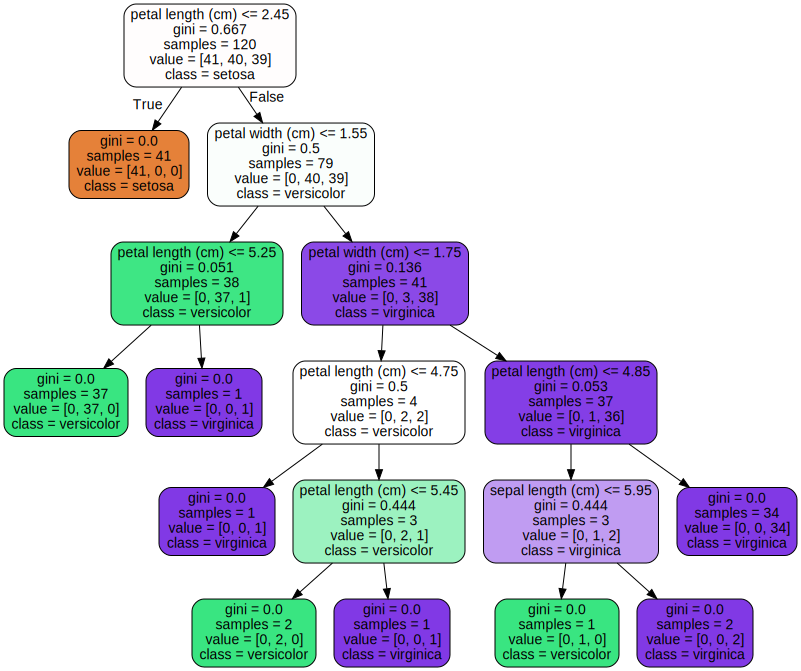

In [15]:
import graphviz

f = open("data/iris_tree.dot")
graphviz.Source(f.read())

# 5단계까지 내려감. 이건 100% 과대적합
# gini는 알고리즘 계수. 어느 것을 선택할 것인가를 의미
# gini계수 // entropy를 이용한 ID3라는 알고리즘

In [16]:
#### 훈련 정확도 뽑아보기

dt_clf.score(X_train, y_train)

1.0

In [17]:
#과적합 생길 수 밖에 없는 구조
dt_clf.score(X_test, y_test)

0.8666666666666667

In [ ]:
##### 복습
# 하이퍼파라미터
# 릿지와 라쏘는 l1, l2, alpha값
# 로지스틱 회귀는 c값
# max_depth

# 2. 과적합 해소를 위한 복잡도 제어 : Prunning(가지치기)

- 분석 단계를 줄이거나 늘이는 방식(사전 가지치기(훈련 전) vs 사후 가지치기(훈련 후))
- sklearn에서는 사후 가지치기만 지원, R에서는 둘 다 지원

+ 하이퍼 파라미터
    * max_depth
    * min_samples_split
    * min_samples_leaf
    * max_features
    * max_leaf_nodes
+ 이거 조합하려면 ... GridSearchCV?를 반드시 써야함

#### (1). max_depth

In [18]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=155).fit(X_train, y_train)
# random_state와 함께 max_depth를 지정해주면 분류 단계 조정 가능

(120, 4) (30, 4) (120,) (30,)


In [19]:
from sklearn.tree import export_graphviz

export_graphviz(
        dt_clf,
        out_file="data/iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
# 1. out_file에서 확장자는 dot이어야한다.
# 2. rounded는 그래프 내 박스 라운드 처리 여부 의미

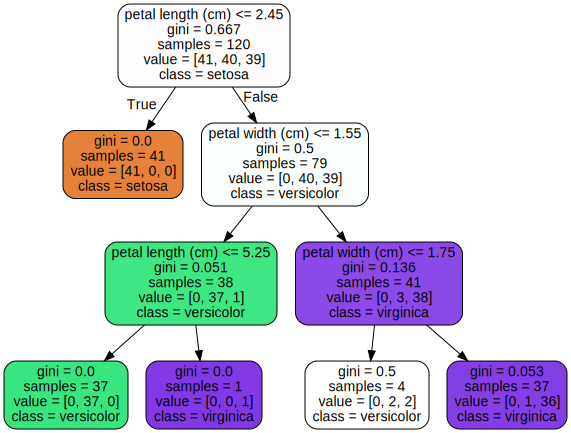

In [20]:
import graphviz
with open("data/iris_tree.dot") as f:
    dot_graph = f.read()
    
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', cleanup=True)
dot

In [25]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

# 주 목적은 훈련된 모델에 새로운 데이터가 들어왔을 때 잘 맞추는 것(정확히 분류하는 것)
# 따라서 훈련 정확도 높은 것도 중요하지만, 테스트 정확도 높은 것이 더 중요하다. 

훈련 정확도 :  0.975
테스트 정확도 :  0.9333333333333333


#### (2). min_samples_split : 분할하기 위한 최소한의 샘플 수

(120, 4) (30, 4) (120,) (30,)


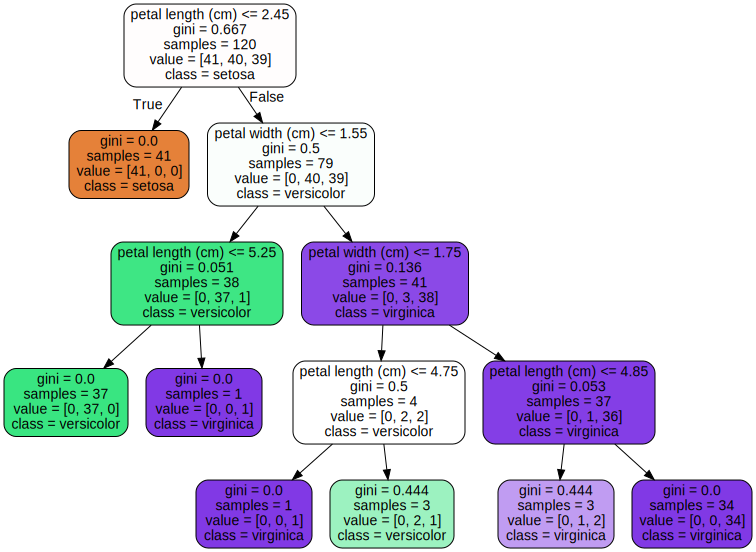

In [29]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=155).fit(X_train, y_train)
#샘플 수가 4개면 거기서 더 이상 가지를 내리지마. 분류하지마란 명령어다.


export_graphviz(
        dt_clf,
        out_file="data/iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

f = open("data/iris_tree.dot")
graphviz.Source(f.read())


In [ ]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

#### (3). min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수
- 리프노드는 자식노드가 없는 독립노드를 의미

(120, 4) (30, 4) (120,) (30,)


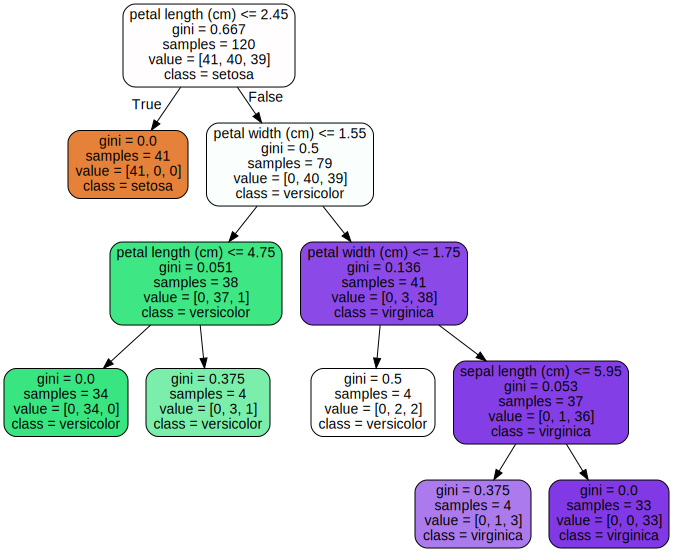

In [31]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=155).fit(X_train, y_train)
#샘플 수가 4개면 거기서 더 이상 자식을 만들지마. 자세히 보면 그래프 모양이 조금 다를 것


export_graphviz(
        dt_clf,
        out_file="data/iris_tree.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

f = open("data/iris_tree.dot")
graphviz.Source(f.read())

# 3. Decision Tree 실제 성능개선 방안 연습해보기
- 1. Prunning : 가지치기
- 2. 영향력 있는 변수들에 가중치를 두는 방법
    + 특성중요도

In [4]:
#### 특성중요도

# 데이터는 iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=155).fit(X_train, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

(120, 4) (30, 4) (120,) (30,)
훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [6]:
#### Entropy : 일종의 복잡도
#### 정리가 잘 안된, 복잡한 것을 측정하는 방식이고 복잡도가 올라갈수록 Entropy도 올라간다.
#### High Entropy, Low Entropy
#### Base - New = Information gain?
#### 기존 데이터의 엔트로피에서 새롭게 들어온 데이터의 엔트로피를 빼준 것이고 이 값을 기준으로 질문 리스트가 정해진다.
#### 이러한 알고리즘 방식을 'ID3' 라고 한다.  

#### [A, A, A, A, B, B, C] 가 있다고 했을 때, 가장 먼저 분류해야하는건? A이냐 아니냐로 A만 뽑아내는게 제일 빠르다.
#### ID3는 이 방식을 수학적으로 만든 거라 보면 된다.

In [7]:
dir(dt_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samp

In [13]:
print(dt_clf.feature_importances_)
print(iris.feature_names)

[0.00594727 0.         0.5459484  0.44810433]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<AxesSubplot:>

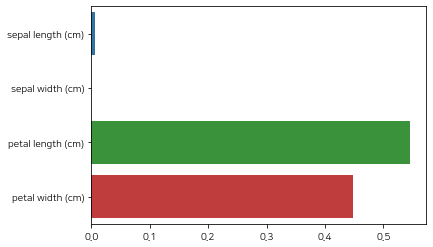

In [12]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [14]:
#### 특성중요도가 높은 변수만 가지고 돌리면???

X = iris.data[:, 2:3]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=155).fit(X_train, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

(112, 4) (38, 4) (112,) (38,)
훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


#### Breast Cancer Sample

In [15]:
#### iris는 정말 말그대로 샘플. 이제 실제 데이터로 해봅시다.

In [17]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
# stratify = 앞에서 배운 stratified K 폴드
# - 두 결과값 수가 불균형해 훈련이 한쪽으로만 진행되는 경우, 두 결과 관련해 균등하게 훈련시키기 위해 사용
# - 타겟값의 숫자를 균등하게 맞춰서 분류 훈련이 두 결과값 모두에 잘 적용되도록 만들어준다.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(426, 30) (143, 30) (426,) (143,)


In [22]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


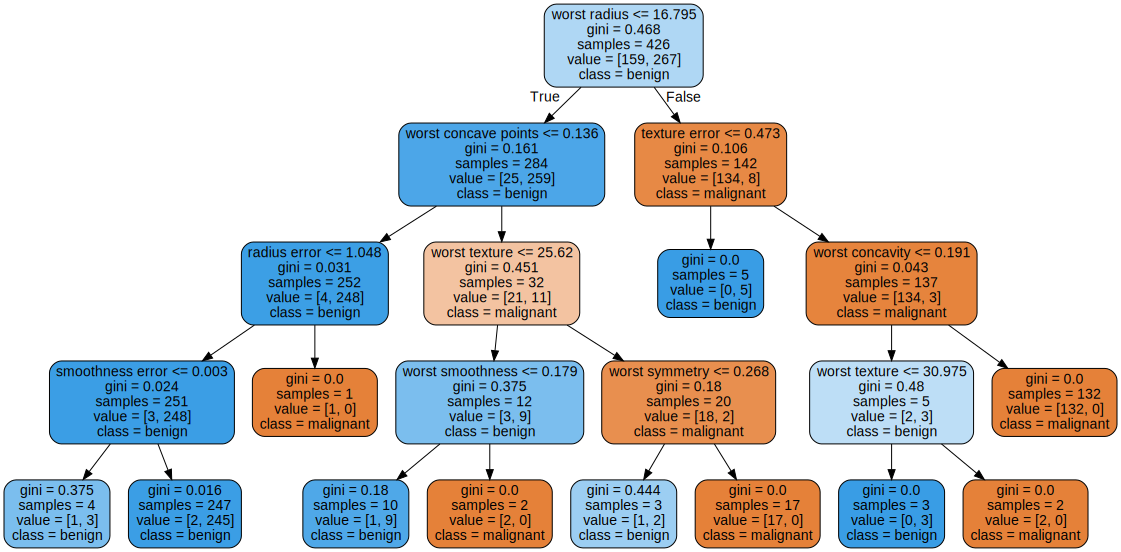

In [23]:
#### 가지를 몇 개나 쳤는지 그래프로 그려봅시다.

export_graphviz(
        dt_clf,
        out_file="data/cancer.dot",
        feature_names=cancer.feature_names,
        class_names=cancer.target_names,
        rounded=True,
        filled=True)

f = open("data/cancer.dot")
graphviz.Source(f.read())


In [24]:
for name, value in zip(cancer.feature_names, dt_clf.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

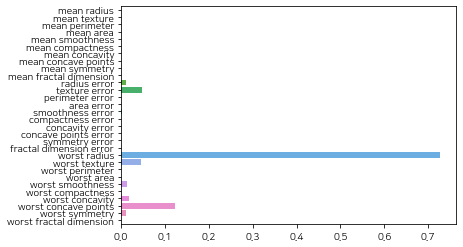

In [26]:
sns.barplot(x=dt_clf.feature_importances_, y=cancer.feature_names)

In [37]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = pd.DataFrame(data=X, columns=['radius error', 'texture error', 'worst radius', 'worst texture', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry'])
y = cancer.target

X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

(426, 8) (143, 8) (426,) (143,)
훈련 정확도 :  0.9788732394366197
테스트 정확도 :  0.958041958041958


#### 서울시 시군구 의사결정나무로 분류하기

In [71]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [72]:
gu_df = pd.DataFrame(district_dict_list)
gu_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [73]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [74]:
dong_df = pd.DataFrame(dong_dict_list)
dong_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [75]:
# 1. 훈련용 : gu_df // 테스트용 : dong_df
# 2. data : lati, long // target : label

X_train = gu_df.iloc[:, 1:3]
X_test = dong_df.iloc[:, 1:3]

y_train = gu_df['label']
y_test = dong_df['label']

In [76]:
# label을 숫자로 바꿔줘야한다.
encode = LabelEncoder()
y_enc = encode.fit_transform(y_train)
y_enc

dong_enc = encode.fit_transform(y_test)
dong_enc

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [77]:
dt_clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_enc)

print("훈련 정확도 : ", dt_clf.score(X_train, y_enc))

훈련 정확도 :  1.0


In [78]:
pred = dt_clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, encode.classes_[pred]))

정확도 :  1.0


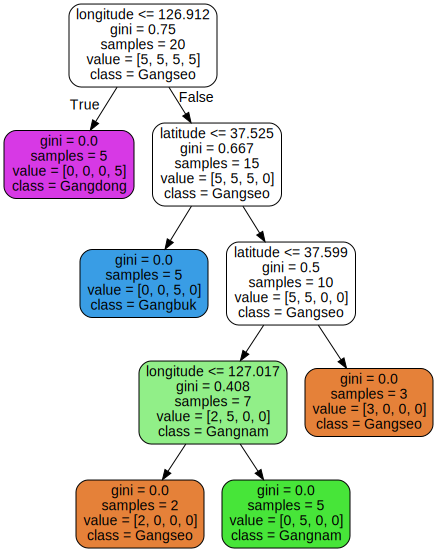

In [79]:
# 파일로 저장하지 말고, 메모리에 올려둔다음 바로 불러오는 방식 ::: out_file 변수에 None을 입력하고 export_graphviz를 메모리에 담을 변수를 지정해준다.
graph = export_graphviz(
        dt_clf,
        out_file=None,
        feature_names=X_train.columns,
        class_names=y_train.unique(),
        rounded=True,
        filled=True)

graphviz.Source(graph)


# 4. RandomForest

- 100개를 한번에 훈련해 분류하는 것 :: DecisionTree
- 100개를 작게 여러 개로 나눠서 훈련해 분류하는 것 :: RandomForest
- DecisionTree는 ID3 방식으로 질문을 선택하는데, RandomForest는 변수를 랜덤하게 정해서 막 분류한다.
- DecisionTree보다 선호되는 이유 : Ensemble 방식이기 때문
    + Ensemble : 여러개의 알고리즘을 잘 결합해 사용! 성능이 더 좋음
    + 알고리즘 간 결과가 다르다면? Vote. 투표로 결정
    + Soft Voting vs Hard Voting
        * Hard Voting : 각각의 알고리즘에게 투표권 1장. 다수결로 판단
        * Soft Voting : 정확도, 정밀도 같은 확률만큼 의사결정 지분을 가짐.

    + Voting : 여러 개의 분류기(알고리즘)가 투표를 통해 최종 예측 결과를 결정하는 방식
        * 같은 데이터셋에서 서로 다른 알고리즘을 결합하는 방식
        * 객체를 사용하기보단 알고리즘 결과를 모아서 하는 경우가 대부분. 물론 객체도 존재
    + Bagging : 서로 다른 샘플 데이터에서 각각의 분류기(알고리즘)가 모두 같은 유형의 알고리즘을 기반해 분석(우리가 하려는 RandomForest가 이 방식)
    + Boosting : 여러 개의 분류기가 순차적으로 학습하되, 앞에서 학습한 분류기가 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여하는 방식
        * Adaptive Boosting : 
        * Gradient Boosting : 속도가 무지하게 느리다는 큰 단점 존재(데이터량이 많아질수록 격하게 느려진다)
        * XG Boosting, Light GBM, Stacking : Adaptive Boosting, Gradient Boosting의 단점을 개선하는 ... 
        * 다만, Bagging(RandomForest 방식과 결과가 크게 차이나진 않는다. 정말 몇% 쥐어짜야할 때 써볼 수 있는 방식)

In [80]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [84]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X, y)
# n_estimators는 작은 의사결정나무의 데이터 갯수를 몇개로 할지 결정하는 인수

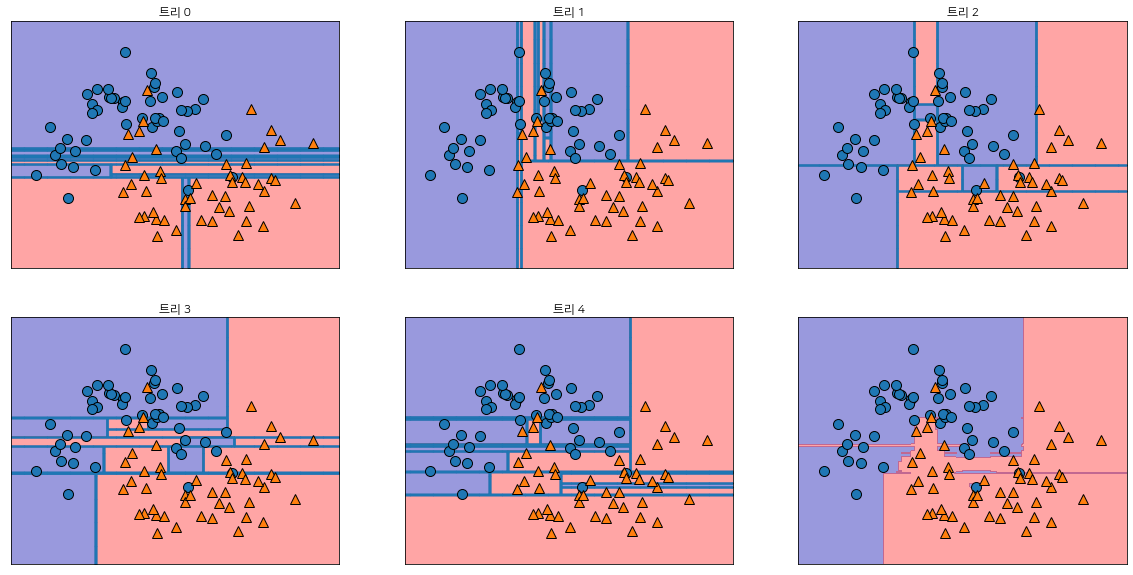

In [86]:
# 그래프로 그려봅시다. 어떻게 훈련이 진행되는지
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## 1. Random Forest와 Decision Tree 비교

In [3]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [4]:
#### DecisionTree ::
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [7]:
#### RandomForest ::
model2 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


In [12]:
#### other case ::::

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, stratify=cancer.target)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#### DecisionTree ::
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("의사결정나무 훈련 정확도 : ", model1.score(X_train, y_train))
print("의사결정나무 테스트 정확도 : ", model1.score(X_test, y_test))

#### RandomForest ::
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("랜덤포레스트 훈련 정확도 : ", model2.score(X_train, y_train))
print("랜덤포레스트 테스트 정확도 : ", model2.score(X_test, y_test))

의사결정나무 훈련 정확도 :  0.9765258215962441
의사결정나무 테스트 정확도 :  0.916083916083916
랜덤포레스트 훈련 정확도 :  0.9976525821596244
랜덤포레스트 테스트 정확도 :  0.9440559440559441


<AxesSubplot:>

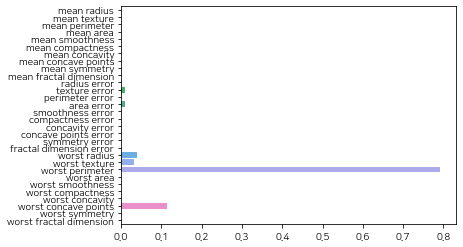

In [10]:
# 어떤 변수를 사용했는지 알아보자
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

<AxesSubplot:>

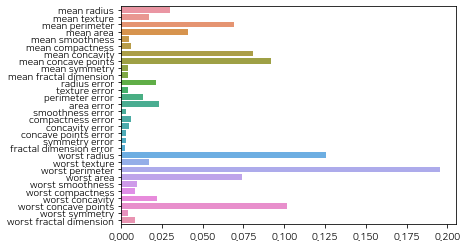

In [13]:
# 어떤 변수를 사용했는지 알아보자
# 변수가 의사결정나무보다 골고루 쓰인 것을 알 수 있다.
# 의사결정나무형을 쓸 때, 대부분 주로 랜덤포레스트를 쓰는 이유다. 더 안정적이고 더 정확하다.
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

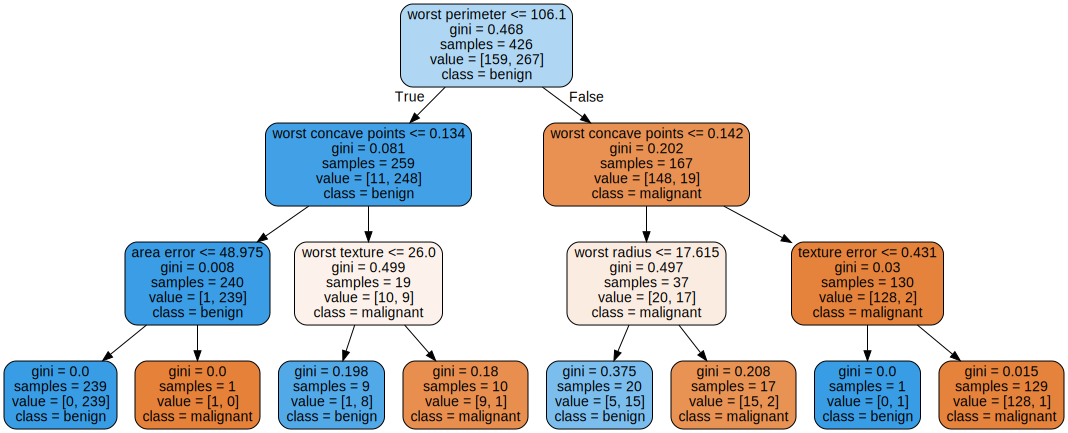

In [33]:
graph = export_graphviz(
        model1,
        out_file=None,
        feature_names=cancer.feature_names,
        class_names=cancer.target_names,
        rounded=True,
        filled=True)

graphviz.Source(graph)

In [27]:
#### digit

mnist = load_digits()
X, y = mnist.data, mnist.target

In [28]:
#### cross validation 사용해서 교차검증 해봅시다.
#### 교차검증을 decision tree와 random forest에서 같이 사용하기 위해 공용 함수로

def cross_val(clf, feature, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(clf, feature, labels, cv=10, scoring="accuracy") #cv 10번 돈 값을 10번 반복하니 총 100번 돌리는 것과 같은 결과 :)
        cv_scores.append(scores.mean())
    
    return cv_scores

In [29]:
dt_cv_score = cross_val(DecisionTreeClassifier(), X, y)

In [30]:
rf_cv_score = cross_val(RandomForestClassifier(), X, y)

In [31]:
print(np.mean(dt_cv_score))
print(np.mean(rf_cv_score))

0.8308112973308504
0.9486331471135939


<AxesSubplot:>

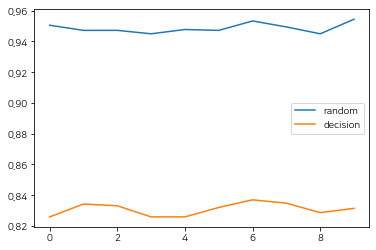

In [32]:
df = pd.DataFrame({'random' : rf_cv_score, 'decision' : dt_cv_score})
df.plot()

## 2. 사례
- 독버섯

### 1. 독버섯 데이터셋
- data from : https://archive.ics.uci.edu/ml/datasets/mushroom

In [38]:
#### 데이터를 불러오는 방법 1 : 판다스
df = pd.read_csv("data/mushrooms.csv", encoding='euc-kr', header=None)
df

#### 0은 종속변수

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [37]:
#### 데이터를 불러오는 방법 2 : 인터넷에서 다운받아 주피터노트북에 바로 올리는 코드로

# savedir = "data/mushrooms_1.csv"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
# req.urlretrieve(url, savedir)
# print("다운로드 완료")

AttributeError: module 'requests' has no attribute 'urlretrieve'

In [42]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [43]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [45]:
#### 0행과 나머지 행을 y(target), X(Feature)로 나눠줍니다.

X = df.iloc[:, 1:]
# X = df[1:]
# X = df.drop(0, axis=1)
y = df[0]

In [46]:
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [47]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [66]:
code = LabelEncoder()

for i in X.columns:
    X[i] = code.fit_transform(X[i])

y = code.fit_transform(y)

/var/folders/dx/ny9cjsmd1bb3r42zbp694xkh0000gn/T/ipykernel_1531/22246279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = code.fit_transform(X[i])


In [67]:
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [68]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [69]:
X = pd.get_dummies(X, columns=X.columns)
X

,1_0,1_1,1_2,1_3,1_4,1_5,2_0,2_1,2_2,2_3,...,21_3,21_4,21_5,22_0,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [84]:
pd.Series(y).value_counts()

0    4208
1    3916
dtype: int64

In [88]:
#### Random Forest

model = RandomForestClassifier().fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [90]:
#### DecisionTree Forest

model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [91]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [92]:
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [93]:
#### 사용자 인식 데이터 셋(책 200p 예제 해보기)

## 3. Gradient Boosting Model
- 교재 222p.
- 분류와 회귀에서 모두 사용 가능
- 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법)
- 무작위 랜덤 방식보다 훨씬 안정적이고 정확
- 다만, 너~무 느리다는 단점
- 랜덤 포레스트보다 매개변수(하이퍼 파라미터) 설정에 민감하지만, 잘 조정하면 더 높은 조정도 제공
- learning_rate 사용하여 오차 보정
- learning_rate는 최저 가중치, 편차가 있는 curve_graph의 point를 찾아가기 위한 보폭 설정이라 보면 된다.
- 너무 크면 지나쳐서 답을 못찾고 헤매다 튕기는 경우가 발생한다.
- 너무 작으면 컴퓨터 폭발할 수도......
- XG boost, Light GBM 등 개선된 알고리즘이 계속 개발 중
- 경사하강법(Gradient Descent Algorithm) : 잘못된 것을 학습하는 방법
    * 오차가 가장 작은 값을 찾아가는 방식 : 처음엔 랜덤하게 w(가중치), b(편차) 결정. 오차를 줄여 나간다.
    * 머신러닝, 딥러닝에서 오차가 최소가 되는 가중치 찾는 방법은 경사하강법을 제일 많이 씀

In [117]:
# 사용방법

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [119]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

## RandomForest보다 좋다고 보긴 어려운데? -> 하이퍼 파라미터에 민감하기 때문
# 랜덤포레스트 훈련 정확도 :  0.9976525821596244
# 랜덤포레스트 테스트 정확도 :  0.9440559440559441

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [120]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [121]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


<AxesSubplot:>

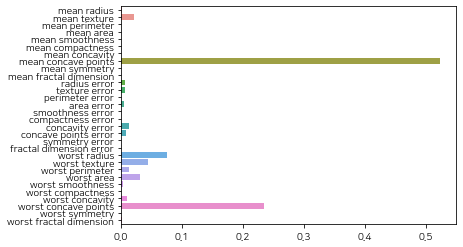

In [122]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

In [123]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))

(750, 2) (250, 2) (750,) (250,)
훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [124]:
### 과적합임. Tunning 해봅시다.
### 최적의 파라미터를 찾아주는

param = {'n_estimators' : [100, 200, 300], 'max_depth' : [2, 3, 4, 5, 6, 7, 8], "min_samples_leaf" : [1,2,3,4,5], "min_samples_split" : [4,8,10,11,12,13,14]}
clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
# n_jobs는 cpu 몇개쓸지 결정

grid_cv = GridSearchCV(clf2, param_grid=param, n_jobs=-1, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [125]:
### 최적의 조합이 저장된 값이 있다. 찾아봅시다.
print("최적의 파라미터 : ", grid_cv.best_params_)

최적의 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}


In [126]:
### 최고 예측 정확도 값도 저장되어있음
print("최고 예측 정확도 :", grid_cv.best_score_)

최고 예측 정확도 : 0.9453333333333334


In [127]:
### 최적의 조합이 저장된 모델에 테스트 데이터 값들 던져보자
grid_cv.score(X_test, y_test)

### 랜덤포레스트도 0.936이었어. 똑같?????

0.936

In [129]:
clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("그라디언트 훈련 정확도 : ", clf3.score(X_train, y_train))
print("그라디언트 테스트 정확도 : ", clf3.score(X_test, y_test))

그라디언트 훈련 정확도 :  0.988
그라디언트 테스트 정확도 :  0.932


In [130]:
param = {'n_estimators' : [100, 200, 300], 'max_depth' : [2, 3, 4, 5, 6, 7, 8], "min_samples_leaf" : [1,2,3,4,5], "min_samples_split" : [4,8,10,11,12,13,14]}
clf4 = GradientBoostingClassifier(random_state=0)
# n_jobs는 cpu 몇개쓸지 결정

grid_cv = GridSearchCV(clf4, param_grid=param, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [131]:
grid_cv.best_estimator_

GradientBoostingClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=4,
                           random_state=0)

In [132]:
grid_cv.best_score_

0.9426666666666667

In [133]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 : ", grid_cv.score(X_test, y_test))

훈련 정확도 :  0.968
테스트 정확도 :  0.94


### (1) XGBoost

+ 트리 기반의 앙상블 기법
+ 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능을 보여준다.
+ XG Boost는 GBM기법이지만, GBM의 단점인 느린 수행과 과적합 규제 부재 등의 문제 해결
+ 이 말은 그라디언트 방식은 과적합 규제할 방법, 파라미터가 없다는 단점이 있다는 의미
+ 병렬 CPU 환경에서 빠르게 학습 가능

#### iris sample

In [3]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=123, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [4]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(X_train, y_train)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
#### 결과 확인
#### 약간의 과적합이 보인다.
print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.9666666666666667


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

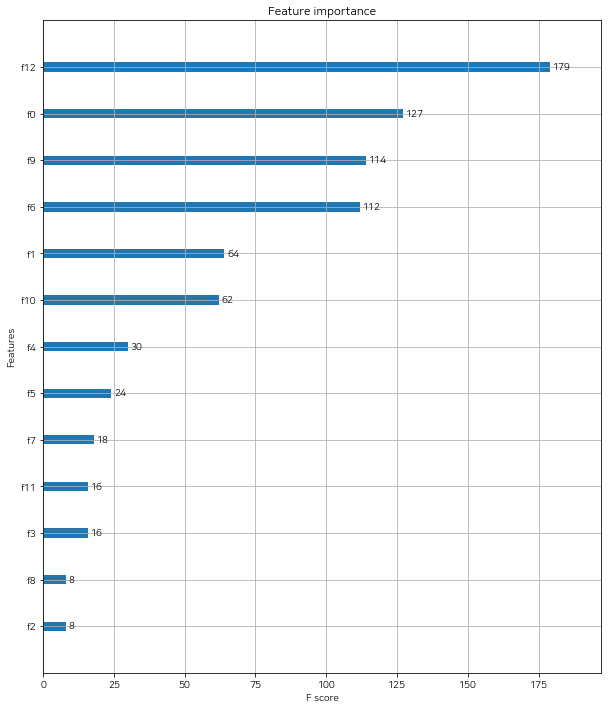

In [20]:
fig, ax = plt.subplots(figsize=(10,12))
xgb.plot_importance(xgbc, ax=ax)

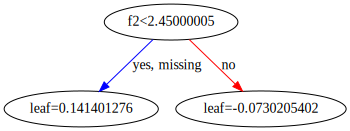

In [9]:
xgb.to_graphviz(xgbc)

#### wine sample

In [10]:
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [13]:
wine.data.shape

(178, 13)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=123, test_size=.2)


xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:17:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 :  1.0


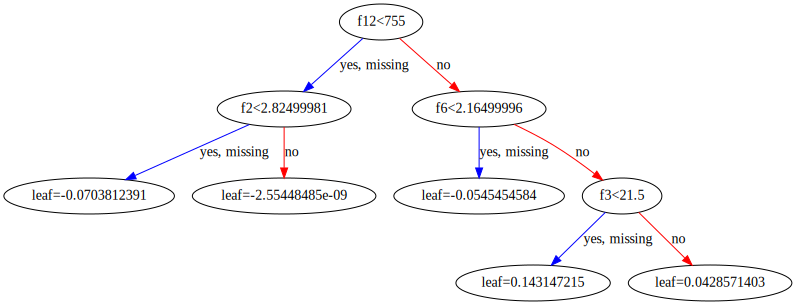

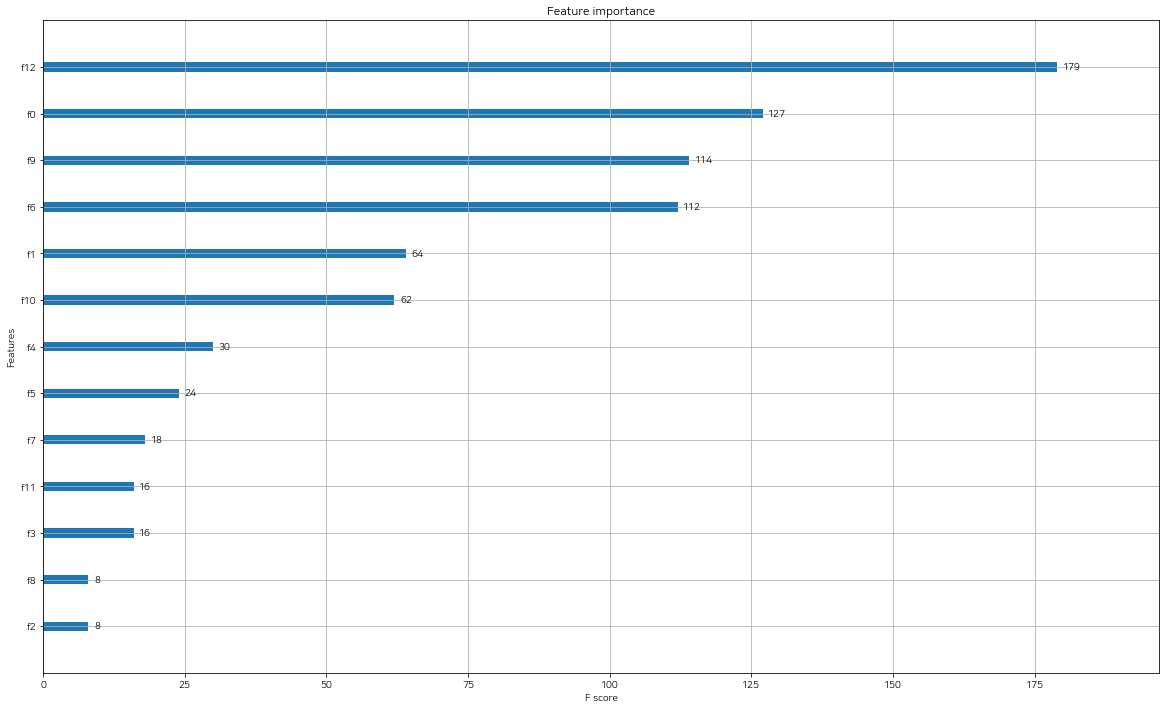

In [19]:
fig, ax = plt.subplots(figsize=(20,12))
plot_importance(xgbc, ax=ax)

xgb.to_graphviz(xgbc)

In [21]:
#### 둘 다 100%면 검증을 한번 더 해보자.
#### Cross Validation 방식 기억하기 1장에 있음

from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle=True)
list(kfold.split(wine.data))

xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)

cv_accuracy = [] # 5번의 테스트 결과를 평균 내주기 위한 저장소 리스트
cnt = 0

for train_index, test_index in kfold.split(wine.data):
    #print("훈련용:", train_index)
    #print("테스트용:", test_index)
    # 테스트용을 보면 0-30, 30,60 ... 을 번갈아가며 테스트하고 있음을 알 수 있다.
    X_train, X_test = wine.data[train_index], wine.data[test_index]
    y_train, y_test = wine.target[train_index], wine.target[test_index]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    #학습 및 예측 테스트
    xgbc.fit(X_train, y_train)
    pred = xgbc.predict(X_test)
    cnt = cnt + 1

    #정확도 측정 : score는 정확성, 설명계수 등 다양하게 쓰임. accuracy_score는 분류_정확성에만! 코드가 훨씬 직관적!
    acc = np.round(accuracy_score(y_test, pred), 4)
    print("{}회 검증 - 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}".format(cnt, acc, X_train.shape[0], X_test.shape[0]))

    cv_accuracy.append(acc)

print("\n 평균 검증 정확도 : {}".format(np.mean(cv_accuracy)))

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1회 검증 - 정확도 : 0.9444, 학습 데이터 크기 : 142, 검증 데이터 크기 : 36
[10:28:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2회 검증 - 정확도 : 0.9167, 학습 데이터 크기 : 142, 검증 데이터 크기 : 36
[10:28:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3회 검증 - 정확도 : 1.0, 학습 데이터 크기 : 142, 검증 데이터 크기 : 36
[10:28:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
4회 검증 - 정확도 : 0.9714, 학습 데이터 크기 : 143, 검증 데이터 크기 : 35
[10:28:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


5회 검증 - 정확도 : 0.9714, 학습 데이터 크기 : 143, 검증 데이터 크기 : 35

 평균 검증 정확도 : 0.9607800000000001


In [26]:
cross_val = cross_validate(xgbc, X = wine.data, y = wine.target, cv=5)
cross_val

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'fit_time': array([0.2105701 , 0.1626308 , 0.12833095, 0.16113472, 0.16370511]),
 'score_time': array([0.00080204, 0.00081515, 0.00081491, 0.00079203, 0.00071192]),
 'test_score': array([0.97222222, 0.91666667, 0.94444444, 0.97142857, 1.        ])}

In [27]:
print("test 정확도 평균 : ", cross_val['test_score'].mean())

test 정확도 평균 :  0.9609523809523809


#### cancer sample

In [28]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123, test_size=.2)


xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 :  0.9736842105263158


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

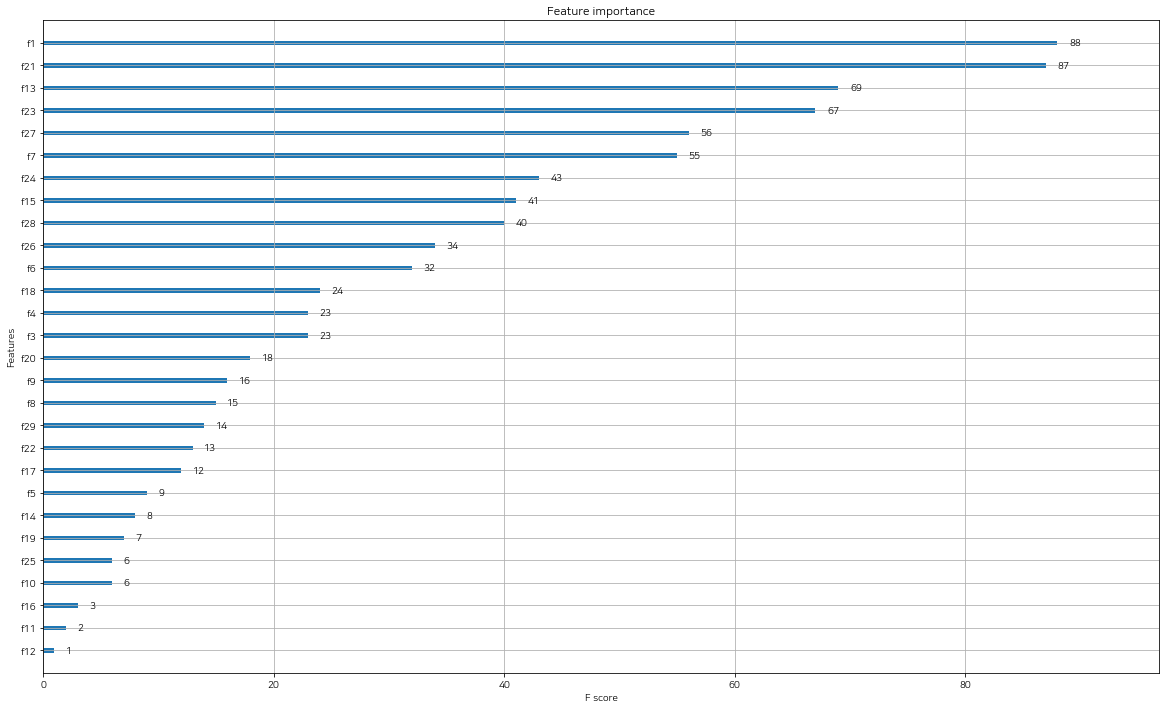

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
plot_importance(xgbc, ax=ax)

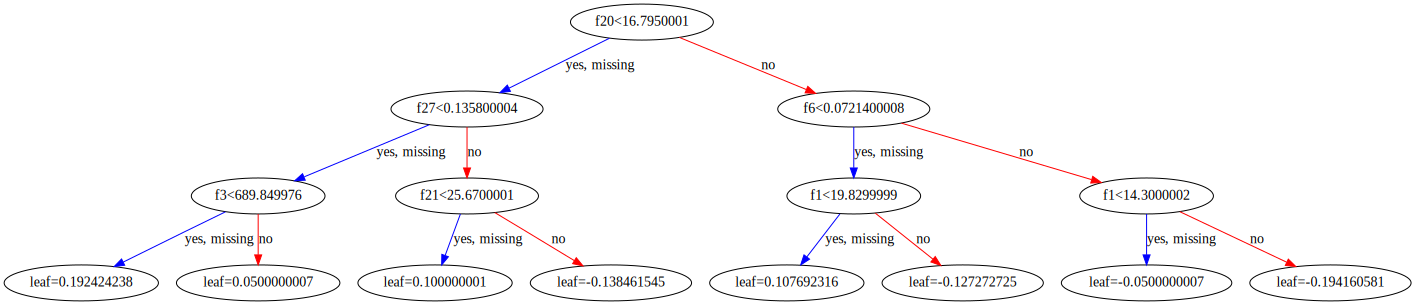

In [30]:
xgb.to_graphviz(xgbc)

In [31]:
cross_val = cross_validate(xgbc, X = cancer.data, y = cancer.target, cv=5)
cross_val

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'fit_time': array([0.24495578, 0.25774097, 0.31995201, 0.17033386, 0.17463708]),
 'score_time': array([0.00178409, 0.00108409, 0.00130415, 0.00099778, 0.00097203]),
 'test_score': array([0.96491228, 0.96491228, 0.99122807, 0.97368421, 0.97345133])}

In [32]:
print("test 정확도 평균 : ", cross_val['test_score'].mean())

test 정확도 평균 :  0.9736376339077782


#### 회귀알고리즘으로 예측모델 만들기

- XGBRegressor
- case : Boston Housing Sample(결과변수가 연속변수인 샘플 :: 집값)
- 원래는 선형알고리즘을 쓰는게 맞다. 우선적으로 활용해야할 모델은 선형모델임을 기억!

##### 1. boston housing

In [36]:
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=123, test_size=.2)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [37]:
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 : ", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9972630325759281
테스트 정확도 :  0.8151645284726049


In [43]:
cross_val = cross_validate(xgbr, boston.data, boston.target, cv=5)
cross_val

{'fit_time': array([0.26563716, 0.14816403, 0.13751984, 0.13324499, 0.13333893]),
 'score_time': array([0.00113297, 0.00079894, 0.00082827, 0.00096989, 0.00127101]),
 'test_score': array([0.78394647, 0.83822744, 0.82128974, 0.58716097, 0.41157075])}

In [41]:
print("Test 평균 점수 : ", cross_val['test_score'].mean())

Test 평균 점수 :  0.6884390736705599


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

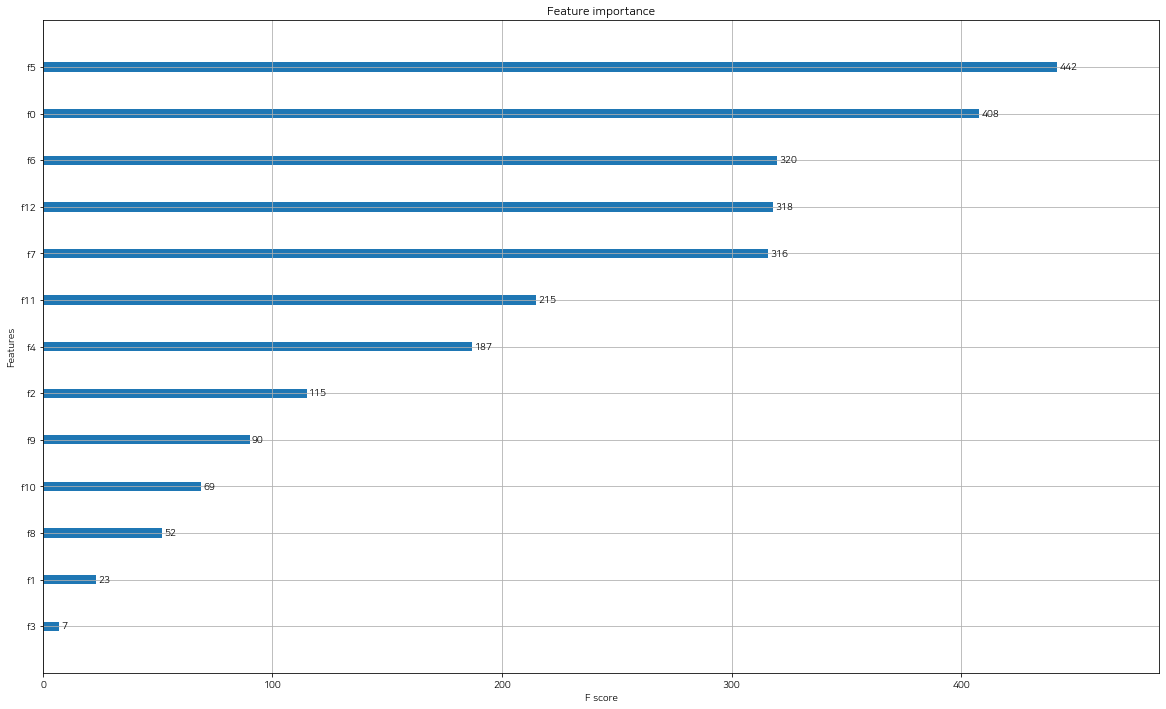

In [44]:
fig, ax = plt.subplots(figsize=(20,12))
plot_importance(xgbr, ax=ax)

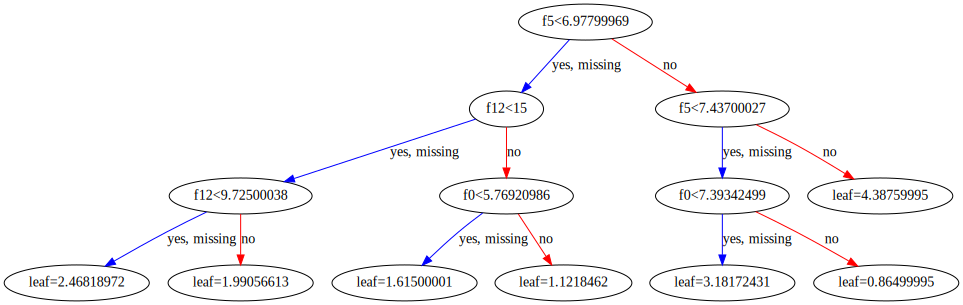

In [45]:
xgb.to_graphviz(xgbr)

##### diabetes

In [46]:
data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=123, test_size=.2)

xgbr = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 : ", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9679523032821651
테스트 정확도 :  0.45470848778208584


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

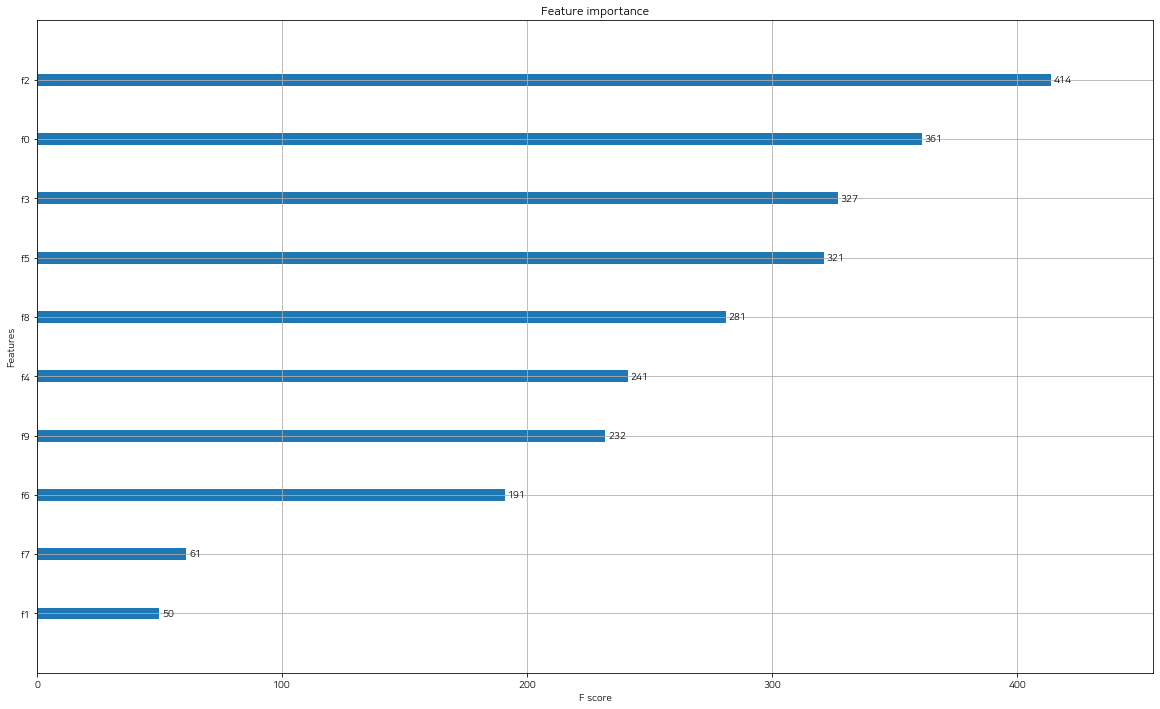

In [47]:
fig, ax = plt.subplots(figsize=(20,12))
plot_importance(xgbr, ax=ax)

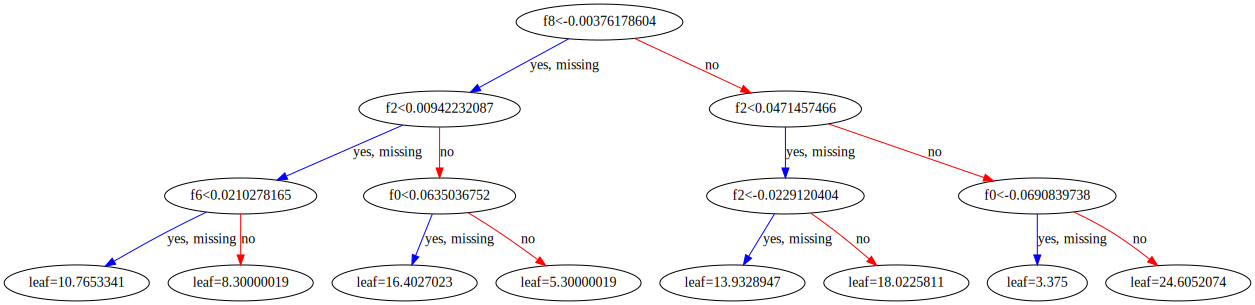

In [48]:
xgb.to_graphviz(xgbr)

In [50]:
cross_val = cross_validate(xgbr, data.data, data.target, cv=5)
print("Test 평균 점수 : ", cross_val['test_score'].mean())

Test 평균 점수 :  0.30005291115066424


### (2) LightGBM

+ 더 빠른 학습과 예측 시간
+ 더 적은 메모리 사용
+ 범주형 특징의 자동 변환과 최적 분할

1) LGBMClassifiera

#### (1). iris

In [6]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=123, test_size=.2)

In [7]:
lgbmc = LGBMClassifier(n_estimators = 400)
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)
# early_stopping_rounds :: lgbmc에서 가장 눈에 띄는 기능인자, 원하는 값 찾았으면 훈련 중지. 쓸데없는 훈련 안해도 됨.
# 최소 100번 돌고, 적정 가중치 찾으면 훈련 중지
# eval_metric :: 오차를 어떻게 측정할 것인가? logloss는 log값을 씌워 오차를 줄여나가겠단 의미
# eval_set :: 
# verbose :: 정보를 조금 더 자세히 뿌려줄지 말지. True=자세히, False=간략히
print("훈련 정확도 : ", lgbmc.score(X_train, y_train))
print("테스트 정확도 : ", lgbmc.score(X_test, y_test))

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [8]:
cross_val = cross_validate(lgbmc, iris.data, iris.target, cv=5)
print("Test 평균 점수 : ", cross_val['test_score'].mean())

Test 평균 점수 :  0.9600000000000002


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

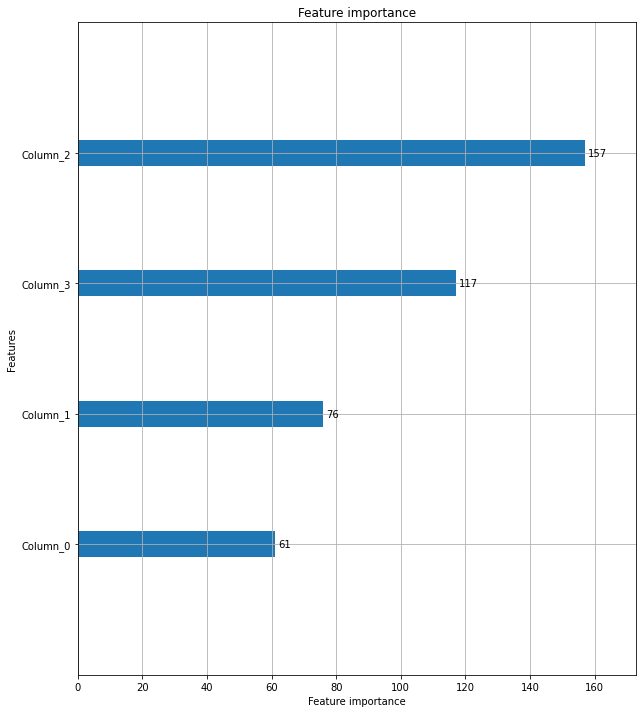

In [9]:
import lightgbm
lightgbm.plot_importance(lgbmc, figsize=(10, 12))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

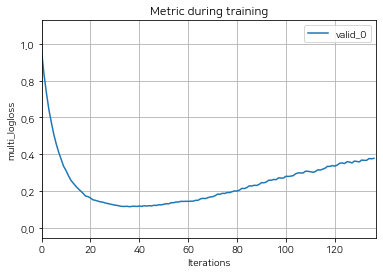

In [59]:
plot_metric(lgbmc)

<AxesSubplot:>

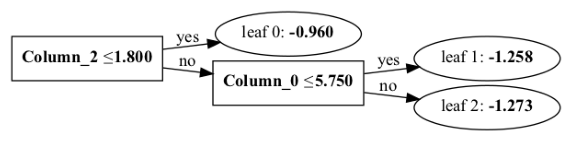

In [60]:
plot_tree(lgbmc, figsize=(10,12))

#### (2) Wine

In [61]:
wine = load_wine()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=123, test_size=.2)


lgbc = LGBMClassifier(n_estimators = 400)
lgbc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbc.score(X_train, y_train))
print("테스트 정확도 : ", lgbc.score(X_test, y_test))

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.05985
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0's multi_logloss: 0.132925
[26]	valid_0's multi_logloss: 0.1251

In [64]:
cross_val = cross_validate(lgbc, X = wine.data, y = wine.target, cv=5)
cross_val

{'fit_time': array([0.28916192, 0.26573992, 0.09997725, 0.08841991, 0.11561608]),
 'score_time': array([0.00070882, 0.00078106, 0.00076389, 0.00104904, 0.00065088]),
 'test_score': array([0.97222222, 0.97222222, 0.97222222, 0.97142857, 1.        ])}

In [65]:
print("test 정확도 평균 : ", cross_val['test_score'].mean())

test 정확도 평균 :  0.9776190476190475


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

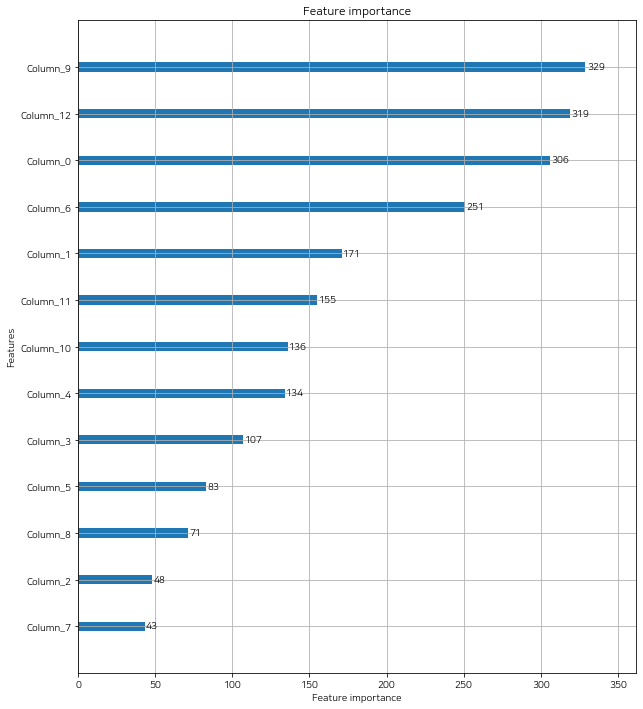

In [66]:
plot_importance(lgbc, figsize=(10,12))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

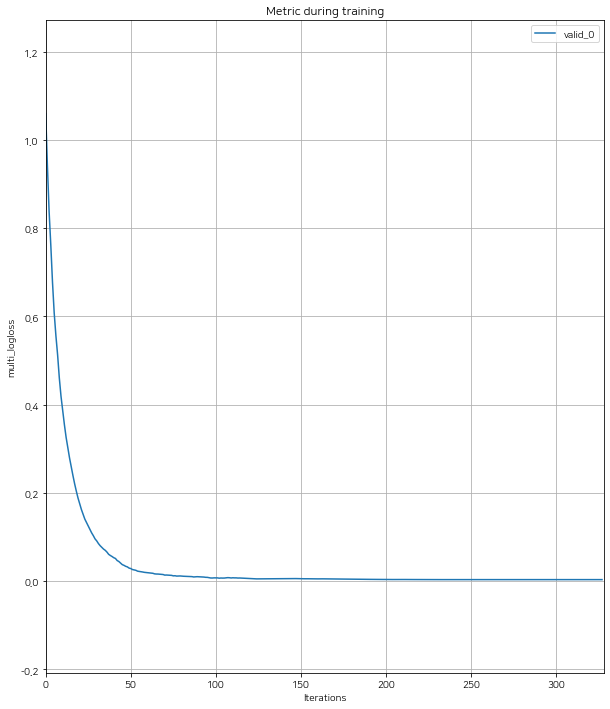

In [67]:
plot_metric(lgbc, figsize=(10,12))

#### breast cancer

In [68]:
cancer = load_breast_cancer()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123, test_size=.2)


lgbc = LGBMClassifier(n_estimators = 400)
lgbc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbc.score(X_train, y_train))
print("테스트 정확도 : ", lgbc.score(X_test, y_test))

#### 여기서 값들은 오차를 의미한다. 값이 줄어들수록 오차가 줄어드는 것을 의미한다.
#### 값이 줄어들수록 좋은 것이란 뜻!

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.575665
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_logloss: 0.119348
[25]	valid_0's binary_logloss: 0.114732
[26]	vali

In [72]:
cross_val = cross_validate(lgbc, X = cancer.data, y = cancer.target, cv=5)
cross_val

{'fit_time': array([0.41518497, 0.30590296, 0.2463572 , 0.2073791 , 0.16000724]),
 'score_time': array([0.00135303, 0.00117898, 0.00103116, 0.00096893, 0.00097084]),
 'test_score': array([0.94736842, 0.96491228, 0.99122807, 0.98245614, 0.98230088])}

In [73]:
print("test 정확도 평균 : ", cross_val['test_score'].mean())

test 정확도 평균 :  0.9736531594472908


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

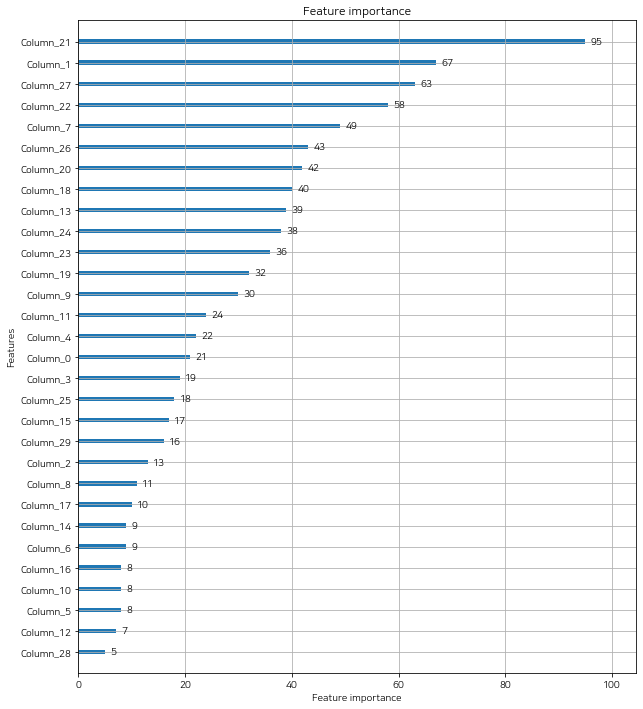

In [74]:
plot_importance(lgbc, figsize=(10,12))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

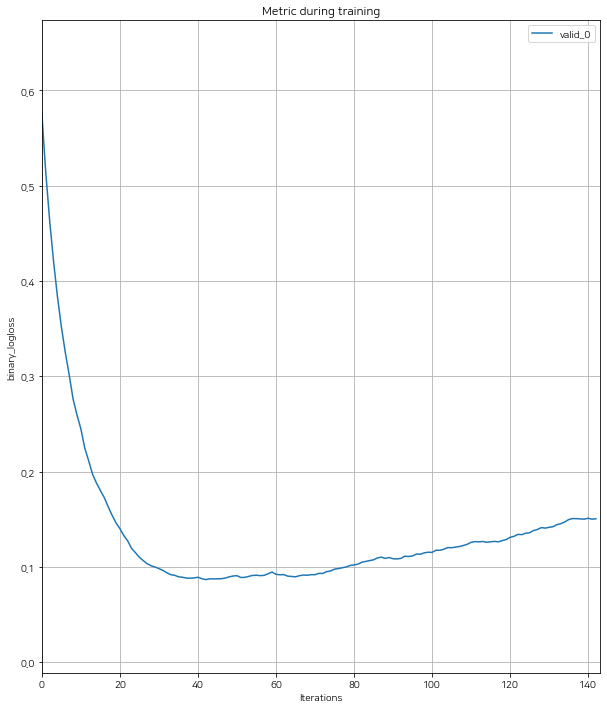

In [75]:
plot_metric(lgbc, figsize=(10,12))

#### 3. boston housing

In [76]:
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=123, test_size=.2)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [78]:
lgbr = LGBMRegressor(n_estimators = 400)
lgbr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbr.score(X_train, y_train))
print("테스트 정확도 : ", lgbr.score(X_test, y_test))

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2: 22.6387
[37]	valid_0's l2: 22.4443
[38]	valid_0's l

In [81]:
cross_val = cross_validate(lgbr, X = boston.data, y = boston.target, cv=5)
cross_val

{'fit_time': array([0.22764182, 0.19179797, 0.19214916, 0.15781474, 0.2692771 ]),
 'score_time': array([0.00194907, 0.00151467, 0.00125885, 0.00139403, 0.00136995]),
 'test_score': array([0.73551531, 0.80257021, 0.78554793, 0.5047667 , 0.01783397])}

In [82]:
print("test 정확도 평균 : ", cross_val['test_score'].mean())

test 정확도 평균 :  0.5692468252571979


In [83]:
data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=123, test_size=.2)

lgbr = LGBMRegressor(n_estimators = 400)
lgbr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)

print("훈련 정확도 : ", lgbr.score(X_train, y_train))
print("테스트 정확도 : ", lgbr.score(X_test, y_test))

cross_val = cross_validate(lgbr, X = data.data, y = data.target, cv=5)
print("test 정확도 평균 : ", cross_val['test_score'].mean())

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 5692.17
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36]	valid_0's l2: 2573.21
[37]	valid_0's l2: 2562.82
[38]	valid_0

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

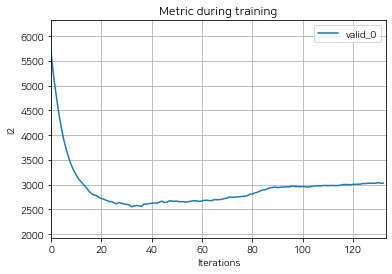

In [84]:
plot_metric(lgbr)

# Voting Classifier

In [86]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123, test_size=.2)


In [87]:
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(max_depth=4)

vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf), ("DT", dt_clf)], voting="soft")
# voting 인자는 투표 방식 "soft" vs "hard"
# soft는 정밀도, 정확도 성적 차에 따라 투표권에 가중치 부여
# hard는 모든 알고리즘에 한표씩

vo_clf.fit(X_train, y_train)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=1000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8)),
                             ('DT', DecisionTreeClassifier(max_depth=4))],
                 voting='soft')

In [88]:
pred = vo_clf.predict(X_test)

print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.9824561403508771


In [89]:
classifiers = [lr_clf, knn_clf, dt_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    class_name = clf.__class__.__name__
    print("{} 정확도 : {}".format(class_name, accuracy_score(y_test, preds)))


LogisticRegression 정확도 : 0.9824561403508771
KNeighborsClassifier 정확도 : 0.9649122807017544
DecisionTreeClassifier 정확도 : 0.9736842105263158


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
